In [7]:
#Lab1
import numpy as np
import matplotlib.pyplot as plt

import nengo
from nengo.dists import Uniform
from nengo.processes import WhiteSignal
from nengo.processes import Piecewise
from nengo.utils.ensemble import tuning_curves
from nengo.utils.ipython import hide_input
from nengo.utils.matplotlib import rasterplot
from scipy.stats import norm

In [25]:
# Create the model object
model = nengo.Network(label="Addition")
with model:
    # Create 5 ensembles each containing 100 leaky integrate-and-fire neurons
    #One ensable per box in our diagram + a begining ensable to convert numbers to spikes?
    begininggg = nengo.Ensemble(100,dimensions=1, radius = 7)
    reluuu = nengo.Ensemble(100, dimensions=1,radius = 7)
    inverseee = nengo.Ensemble(100, dimensions=1,radius = 7)
    normmm = nengo.Ensemble(100, dimensions=2, radius = 7) #dimension 2 bc now it has two inputs to do pythagoiam
    absss = nengo.Ensemble(100, dimensions=1, radius = 7)
    F = nengo.Ensemble(100, dimensions=1, radius = 7)
    finish = nengo.Ensemble(100,dimensions=1, radius = 7)
    
    # Create input nodes representing piecewise values
    input_a = nengo.Node(Piecewise({0: -5, 1: -2, 2: 3, 3: 5, 4: -2}))
    correct_ans = Piecewise({0:5, 1:1, 2:3, 3:7, 4:1})
    output_node = nengo.Node(size_in=1)
    
#Define Functions:

with model:
    def relu(x):
        return np.maximum(0,x)
    def inverse(x):
        return -1*x
    def normalize(x):
        return np.sqrt(x[0]**2 +x[1]**2)
    def absolute(x):
        return np.abs(x) #Might not need this one since it's already defined
    def my_function(x):
        return 2*x-5
        
    
    #Connect the input nodes to the appropriate ensembles
    nengo.Connection(input_a, begininggg)
    nengo.Connection(begininggg, reluuu, function=relu)
    nengo.Connection(reluuu, inverseee, function=inverse)
    nengo.Connection(begininggg, absss, function=absolute)
    nengo.Connection(absss, F, function=my_function)
    nengo.Connection(inverseee, normmm[0])
    nengo.Connection(F, normmm[1])
    nengo.Connection(normmm, finish, function=normalize)

    # Connect input ensembles A and B to output ensemble C
    # nengo.Connection(A, C)
    # nengo.Connection(B, C)

#############each box is an ensable of neurosna and we are connecting these ensables together with the nengo.connection functions and this is where the actual operation

Build finished in 0:00:01.                                                      
Simulation finished in 0:00:03.                                                 


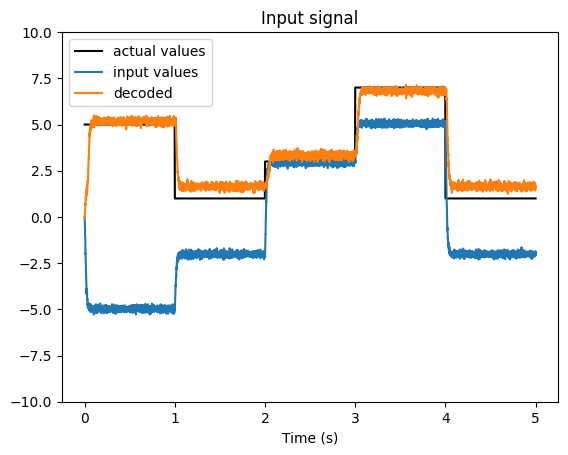

In [29]:
with model:

    #probe it
    input_probe = nengo.Probe(input_a)
    encoded_probe = nengo.Probe(begininggg, synapse=0.01)
    complete_probe = nengo.Probe(finish, synapse = 0.01)


    # Run it!
    with nengo.Simulator(model) as sim:
        sim.run(5.0)

    # Plot input
    plt.figure()
    plt.plot(sim.trange(), correct_ans.run(sim.time, dt = sim.dt),c="k", label = "actual values")
    plt.plot(sim.trange(), sim.data[encoded_probe], label = "input values")
    plt.plot(sim.trange(), sim.data[complete_probe], label = "decoded")
    plt.title("Input signal")
    plt.xlabel("Time (s)")
    plt.ylim(-10, 10)
    plt.legend(loc="best")
